In [1]:
import numpy as np
import math

In [3]:
x_points = [0,0,0,0,0,0]
y_points = [0,0,0,0,0,0]
x_points[0] = 524
y_points[0] = 512
x_points[1] = 1998
y_points[1] = 529
x_points[2] = 884
y_points[2] = 641
x_points[3] = 842
y_points[3] = 637
x_points[4] = 881
y_points[4] = 501
x_points[5] = 846
y_points[5] = 485

In [4]:
x_points

[524, 1998, 884, 842, 881, 846]

In [21]:
y_points

[512, 529, 641, 637, 501, 485]

In [55]:
def draw_line(vector, color):
    a = vector[0]
    b = vector[1]
    c = vector[2]
    m = - (a/b)
    i = - (c/b)
    x = np.linspace(-2000,2500,100)
    y = m*x+i
    plt.plot(x, y, c=color)

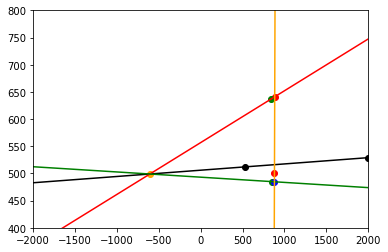

In [80]:
import matplotlib.pyplot as plt
plt.xlim(-2000,2000)
plt.ylim(400,800)

plt.scatter(x_points[0], y_points[0], c='black')
plt.scatter(x_points[1], y_points[1], c='black')
plt.scatter(x_points[2], y_points[2], c='red')
plt.scatter(x_points[3], y_points[3], c='green')
plt.scatter(x_points[4], y_points[4], c='red')
plt.scatter(x_points[5], y_points[5], c='green')

vanishing_point1 = np.array([x_points[0], y_points[0], 1]).T
vanishing_point2 = np.array([x_points[1], y_points[1], 1]).T
l = np.cross(vanishing_point1, vanishing_point2)
draw_line(l, 'black')


b = np.array([x_points[2], y_points[2], 1]).T
br = np.array([x_points[3], y_points[3], 1]).T
b_br = np.cross(b, br)
draw_line(b_br, 'r')

q = np.cross(l, b_br)
plt.scatter((q/q[2])[0], (q/q[2])[1], c='orange')


tr = np.array([x_points[5], y_points[5], 1]).T
tr_q = np.cross(tr, q/q[2])
draw_line(tr_q, 'g')

t = np.array([x_points[4], y_points[4], 1]).T
tb = np.cross(t, b)
draw_line(tb, 'orange')


i = np.cross(tb, tr_q)
plt.scatter((i/i[2])[0], (i/i[2])[1], c='blue')

plt.show()

In [109]:
new_i = i/i[2]
new_q = q/q[2]

In [95]:
new_i

array([880.65001691, 484.66745594,   1.        ])

In [89]:
import cv2 as cv

In [90]:
path = r'C:\Users\cvlab\Desktop\TrackSun\test.png'
img = cv.imread(path)
img = cv.resize(img, dsize=(0, 0), fx=0.3, fy=0.3, interpolation=cv.INTER_LINEAR)


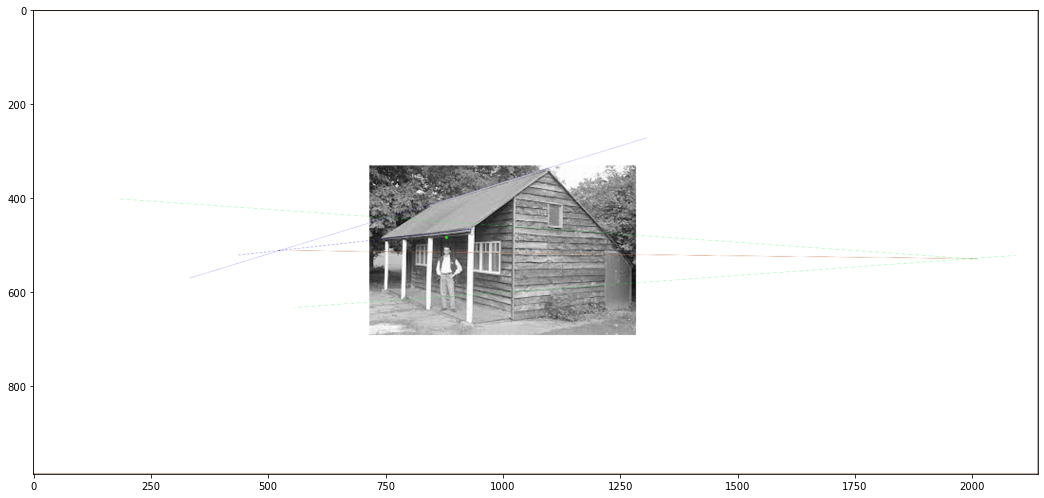

In [108]:
img = cv.line(img, (int(new_i[0]), int(new_i[1])), (int(new_i[0]), int(new_i[1])), (0,255,0), 5) #vanish point1
#cv.imshow('image',img)
#cv.waitKey(0)
#cv.destroyAllWindows()
plt.figure(figsize=(18,10))
plt.imshow(img)

In [112]:
def distance(a, b):
    result = math.sqrt( math.pow(a[0] - b[0], 2) + math.pow(a[1] - b[1], 2))# + math.pow(a[2] - b[2], 2))
    return result
hr = 201
p = np.array([np.inf, i[1], 1])
H = np.array([[hr * (distance(p, b) - distance(i, b)), 0],[-distance(i, b), distance(p, b) * distance(i, b)]])

s = np.dot(H, np.array([distance(t, b), 1]))


In [117]:
H

array([[            inf,  0.00000000e+00],
       [-2.04594927e+08,             inf]])

In [115]:
s/s[1]

<ipython-input-115-11576e281c5f>:1: RuntimeWarning: invalid value encountered in true_divide
  s/s[1]


array([nan, nan])